# Julia for Data Science

In [1]:
# for reproducibility
versioninfo()

Julia Version 1.7.1
Commit ac5cc99908 (2021-12-22 19:35 UTC)
Platform Info:
  OS: macOS (x86_64-apple-darwin19.5.0)
  CPU: Intel(R) Core(TM) i7-6920HQ CPU @ 2.90GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-12.0.1 (ORCJIT, skylake)
Environment:
  JULIA_EDITOR = code
  JULIA_NUM_THREADS = 4


From previous two tutorials, we practiced a few essential data wrangling steps in R and Python.

- Pipes

- Data ingestion 

- Data filtering (rows) and selection (columns)

- Data sorting and ranking

- Data merging (joins)

- Mutate (dplyr) or transform (Julia)

- Pivot (dplyr) or reshape (Julia)

- Group by

- Data summaries

- Visualization

The Julia package [DataFrames.jl](https://dataframes.juliadata.org/stable/#DataFrames.jl) is the analog of `dplyr` and `data.table` in R and panda in Python. 

Optional reading: [Comparison of DataFrames.jl with Python/R/Stata](https://dataframes.juliadata.org/stable/man/comparisons/).

In [2]:
using AlgebraOfGraphics, CairoMakie, CodecZlib, CSV, DataFrames, Dates, Pipe

In [3]:
# path to MIMIC data
mimic_path = Base.Sys.islinux() ? "/home/shared/1.0" : "/Users/huazhou/Documents/Box Sync/MIMIC/mimic-iv-1.0"

"/Users/huazhou/Documents/Box Sync/MIMIC/mimic-iv-1.0"

In [4]:
# for printing all columns of DataFrame
ENV["COLUMNS"] = 1000

1000

## Data ingestion

Plain text files can be parsed by the CSV.jl package.

### icustays_tbl

We use the `dataformat` argument to correctly parse `charttime` as `DateTime`.

In [5]:
icustays_tbl = CSV.File(
    mimic_path * "/icu/icustays.csv.gz",
    dateformat = "yyyy-mm-dd HH:MM:SS"
    ) |> DataFrame

,subject_id,hadm_id,stay_id,first_careunit,last_careunit,intime,outtime,los
,Int64,Int64,Int64,String,String,DateTime,DateTime,Float64
1,17867402,24528534,31793211,Trauma SICU (TSICU),Trauma SICU (TSICU),2154-03-03T04:11:00,2154-03-04T18:16:56,1.58745
2,14435996,28960964,31983544,Trauma SICU (TSICU),Trauma SICU (TSICU),2150-06-19T17:57:00,2150-06-22T18:33:54,3.02562
3,17609946,27385897,33183475,Trauma SICU (TSICU),Trauma SICU (TSICU),2138-02-05T18:54:00,2138-02-15T12:42:05,9.74172
4,18966770,23483021,34131444,Trauma SICU (TSICU),Trauma SICU (TSICU),2123-10-25T10:35:00,2123-10-25T18:59:47,0.350544
5,12776735,20817525,34547665,Neuro Stepdown,Neuro Stepdown,2200-07-12T00:33:00,2200-07-13T16:44:40,1.67477
6,10215159,24283593,34569476,Trauma SICU (TSICU),Trauma SICU (TSICU),2124-09-20T15:05:29,2124-09-21T22:06:58,1.2927
7,14489052,26516390,35056286,Trauma SICU (TSICU),Trauma SICU (TSICU),2118-10-26T10:33:56,2118-10-26T20:28:10,0.412662
8,15914763,28906020,36909804,Trauma SICU (TSICU),Trauma SICU (TSICU),2176-12-14T12:00:00,2176-12-17T11:47:01,2.99098
9,16256226,20013290,39289362,Neuro Stepdown,Neuro Stepdown,2150-12-20T16:09:08,2150-12-21T14:58:40,0.951065


### admissions_tbl

In [6]:
admissions_tbl = CSV.File(
    mimic_path * "/core/admissions.csv.gz",
    dateformat = "yyyy-mm-dd HH:MM:SS"
    ) |> DataFrame

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,marital_status,ethnicity,edregtime,edouttime,hospital_expire_flag
,Int64,Int64,DateTime,DateTime,DateTime?,String31,String?,String31?,String15,String7,String15?,String31,DateTime?,DateTime?,Int64
1,14679932,21038362,2139-09-26T14:16:00,2139-09-28T11:30:00,missing,ELECTIVE,missing,HOME,Other,ENGLISH,SINGLE,UNKNOWN,missing,missing,0
2,15585972,24941086,2123-10-07T23:56:00,2123-10-12T11:22:00,missing,ELECTIVE,missing,HOME,Other,ENGLISH,missing,WHITE,missing,missing,0
3,11989120,21965160,2147-01-14T09:00:00,2147-01-17T14:25:00,missing,ELECTIVE,missing,HOME,Other,ENGLISH,missing,UNKNOWN,missing,missing,0
4,17817079,24709883,2165-12-27T17:33:00,2165-12-31T21:18:00,missing,ELECTIVE,missing,HOME,Other,ENGLISH,missing,OTHER,missing,missing,0
5,15078341,23272159,2122-08-28T08:48:00,2122-08-30T12:32:00,missing,ELECTIVE,missing,HOME,Other,ENGLISH,missing,BLACK/AFRICAN AMERICAN,missing,missing,0
6,19124609,20517215,2169-03-14T12:44:00,2169-03-20T19:15:00,missing,ELECTIVE,missing,HOME,Other,ENGLISH,missing,UNKNOWN,missing,missing,0
7,17301855,29732723,2140-06-06T14:23:00,2140-06-08T14:25:00,missing,ELECTIVE,missing,HOME,Other,ENGLISH,missing,WHITE,missing,missing,0
8,17991012,24298836,2181-07-10T20:28:00,2181-07-12T15:49:00,missing,ELECTIVE,missing,HOME,Other,ENGLISH,missing,WHITE,missing,missing,0
9,16865435,23216961,2185-07-19T02:12:00,2185-07-21T11:50:00,missing,ELECTIVE,missing,HOME,Other,ENGLISH,missing,WHITE,missing,missing,0


### patients_tbl

In [7]:
patients_tbl = CSV.File(mimic_path * "/core/patients.csv.gz") |> DataFrame

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod
,Int64,String1,Int64,Int64,String15,Date?
1,10000048,F,23,2126,2008 - 2010,missing
2,10002723,F,0,2128,2017 - 2019,missing
3,10003939,M,0,2184,2008 - 2010,missing
4,10004222,M,0,2161,2014 - 2016,missing
5,10005325,F,0,2154,2011 - 2013,missing
6,10007338,F,0,2153,2017 - 2019,missing
7,10008101,M,0,2142,2008 - 2010,missing
8,10009872,F,0,2168,2014 - 2016,missing
9,10011333,F,0,2132,2014 - 2016,missing


### chartevents_tbl

We use the `dataformat` argument to correctly parse `charttime` as `DateTime`.

In [8]:
chartevents_tbl = CSV.File(
    mimic_path * "/icu/chartevents_filtered_itemid.csv.gz", 
    dateformat = "yyyy-mm-dd HH:MM:SS"
    ) |> 
    DataFrame

,subject_id,hadm_id,stay_id,charttime,itemid,valuenum
,Int64,Int64,Int64,DateTime,Int64,Float64
1,10003700,28623837,30600691,2165-04-24T05:28:00,220179,152.0
2,10003700,28623837,30600691,2165-04-24T05:28:00,220181,110.0
3,10003700,28623837,30600691,2165-04-24T05:30:00,220045,65.0
4,10003700,28623837,30600691,2165-04-24T05:30:00,220210,14.0
5,10003700,28623837,30600691,2165-04-24T05:38:00,223761,97.6
6,10003700,28623837,30600691,2165-04-24T06:00:00,220045,56.0
7,10003700,28623837,30600691,2165-04-24T06:00:00,220179,126.0
8,10003700,28623837,30600691,2165-04-24T06:00:00,220181,88.0
9,10003700,28623837,30600691,2165-04-24T06:00:00,220210,14.0


Let's visualize the heart rate readings for a specific stay.

In [9]:
#filter(row -> row.stay_id == 30600691 && row.itemid == 220045, chartevents_tbl) |> 
chartevents_subset = @pipe chartevents_tbl |> 
    filter(row -> row.stay_id == 30600691 && row.itemid == 220045, _) |> 
    select(_, [:charttime, :valuenum]) |>
    DataFrame

,charttime,valuenum
,DateTime,Float64
1,2165-04-24T05:30:00,65.0
2,2165-04-24T06:00:00,56.0
3,2165-04-24T06:09:00,55.0
4,2165-04-24T07:00:00,57.0
5,2165-04-24T08:00:00,56.0


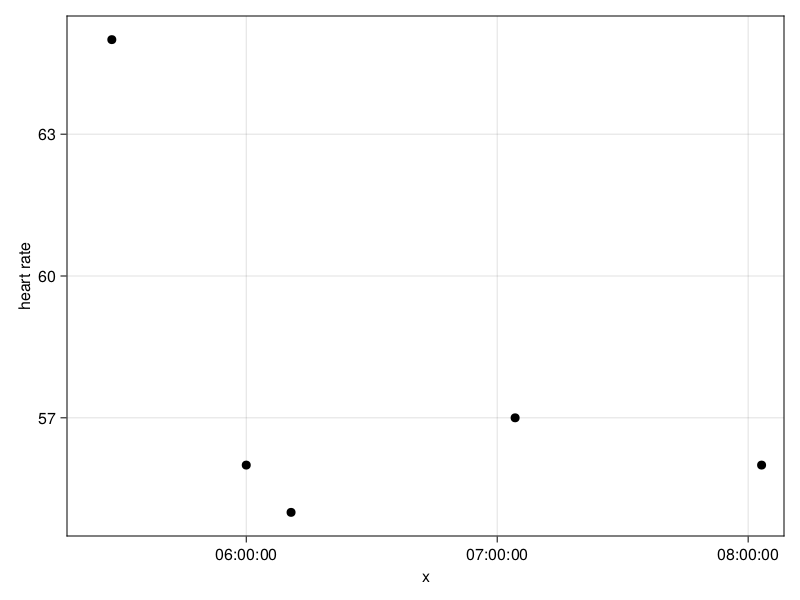

In [10]:
x = chartevents_subset[!, :charttime]
y = chartevents_subset[!, :valuenum]
df = (; x, y)
plt = data(df) *
    mapping(:x, [:y] .=> "heart rate") *
    visual(Scatter)
draw(plt)

## Target cohort (from R session)

Let's continue on with the task we did with R. We aim to develop a predictive model, which computes the chance of dying within 30 days of ICU stay `intime` based on baseline features  
- `first_careunit`  
- `age` at `intime`  
- `gender`  
- `ethnicity`  
- first measurement of the following vitals since ICU stay `intime`  
    - 220045 for heart rate  
    - 220181 for Non Invasive Blood Pressure mean  
    - 220179 for Non Invasive Blood Pressure systolic  
    - 223761 for Temperature Fahrenheit  
    - 220210 for Respiratory Rate  

We restrict to the first ICU stays of each unique patient. 

## Wrangling and merging data frames

Our stragegy is

1. Identify and keep the first ICU stay of each patient. 

2. Identify and keep the first vital measurements during the first ICU stay of each patient.

3. Join four data frames into a single data frame.

Important data wrangling concepts: group_by, sort, slice, joins, and pivot.

### Step 1: restrict to the first ICU stay of each patient

`icustays_df` has 76,540 rows, which is reduced to 53,150 unique ICU stays.

In [11]:
icustays_tbl_1ststay = @pipe icustays_tbl |>
    sort(_, [:subject_id, :intime]) |>
    unique(_, :subject_id)

,subject_id,hadm_id,stay_id,first_careunit,last_careunit,intime,outtime,los
,Int64,Int64,Int64,String,String,DateTime,DateTime,Float64
1,10000032,29079034,39553978,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2180-07-23T14:00:00,2180-07-23T23:50:47,0.410266
2,10000980,26913865,39765666,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2189-06-27T08:42:00,2189-06-27T20:38:27,0.497535
3,10001217,24597018,37067082,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2157-11-20T19:18:02,2157-11-21T22:08:00,1.11803
4,10001725,25563031,31205490,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),2110-04-11T15:52:22,2110-04-12T23:59:56,1.33859
5,10001884,26184834,37510196,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2131-01-11T04:20:05,2131-01-20T08:27:30,9.17182
6,10002013,23581541,39060235,Cardiac Vascular Intensive Care Unit (CVICU),Cardiac Vascular Intensive Care Unit (CVICU),2160-05-18T10:00:53,2160-05-19T17:33:33,1.31435
7,10002155,23822395,33685454,Coronary Care Unit (CCU),Coronary Care Unit (CCU),2129-08-04T12:45:00,2129-08-10T17:02:38,6.17891
8,10002223,22494570,39638202,Trauma SICU (TSICU),Trauma SICU (TSICU),2158-01-15T08:01:49,2158-01-16T15:19:24,1.30388
9,10002348,22725460,32610785,Neuro Intermediate,Neuro Intermediate,2112-11-30T23:24:00,2112-12-10T18:25:13,9.79251


### Step 2: restrict to the first vital measurements during the ICU stay
​
Key data wrangling concepts: select, left_join, right_join, group_by, arrange, pivot.

In [12]:
chartevents_tbl_1ststay = @pipe chartevents_tbl |>
    # pull in the intime/outtime of each ICU stay
    rightjoin(_, select(icustays_tbl_1ststay, :stay_id, :intime, :outtime), on = :stay_id) |> 
    # only keep items during this ICU intime
    filter(row -> ismissing(row.charttime) ? false : (row.charttime ≥ row.intime && row.charttime ≤ row.outtime), _) |>
    # only keep the first charttime for each stay_id x item
    sort(_, [:stay_id, :itemid, :charttime]) |>
    unique(_, [:stay_id, :itemid]) |>
    # do not need charttime, intime and outtime anymore
    select(_, Not([:charttime, :intime, :outtime])) |>
    # pivot_wider (R) or reshape (Julia)
    unstack(_, [:subject_id, :hadm_id, :stay_id], :itemid, :valuenum) |>
    # more informative column names
    rename(_, Dict(
        "220045" => "heart_rate", 
        "220181" => "bp_mean", 
        "220179" => "bp_syst",
        "223761" => "temp_f",
        "220210" => "resp_rate"
        ))

,subject_id,hadm_id,stay_id,heart_rate,bp_syst,bp_mean,resp_rate,temp_f
,Int64?,Int64?,Int64,Float64?,Float64?,Float64?,Float64?,Float64?
1,12466550,23998182,30000153,104.0,113.0,84.0,18.0,99.1
2,12207593,22795209,30000646,100.0,107.0,75.0,28.0,98.8
3,12980335,23552849,30001148,80.0,102.0,62.0,7.0,95.6
4,12168737,29283664,30001336,65.0,110.0,65.0,30.0,98.5
5,17371178,24502166,30001396,86.0,169.0,115.0,19.0,98.8
6,16513856,24463832,30001446,82.0,75.0,61.0,22.0,98.1
7,19609454,24188515,30001656,99.0,171.0,122.0,16.0,98.9
8,15904173,23836605,30001947,105.0,121.0,90.0,14.0,97.9
9,17921898,28841024,30002415,80.0,139.0,104.0,14.0,97.6


### Step 3: merge data frames

New data wrangling concept: mutate.

In [13]:
mimic_icu_cohort = @pipe icustays_tbl_1ststay |>
    # merge data frames
    leftjoin(_, admissions_tbl, on = [:subject_id, :hadm_id]) |>
    leftjoin(_, patients_tbl, on = [:subject_id]) |>
    leftjoin(_, chartevents_tbl_1ststay, on = [:stay_id, :subject_id, :hadm_id]) |>
    # age_intime is the age at ICU stay intime
    insertcols!(_, :age_intime => _.anchor_age .+ year.(_.intime) .- _.anchor_year) |>
    # whether the patient died within 30 days of ICU stay intime
    insertcols!(_, :hadm_to_death => _.deathtime .- _.intime) |>
    insertcols!(_, :thirty_day_mort => _.hadm_to_death .≤ Millisecond(2592000000))

,subject_id,hadm_id,stay_id,first_careunit,last_careunit,intime,outtime,los,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,marital_status,ethnicity,edregtime,edouttime,hospital_expire_flag,gender,anchor_age,anchor_year,anchor_year_group,dod,heart_rate,bp_syst,bp_mean,resp_rate,temp_f,age_intime,hadm_to_death,thirty_day_mort
,Int64,Int64,Int64,String,String,DateTime,DateTime,Float64,DateTime?,DateTime?,DateTime?,String31?,String?,String31?,String15?,String7?,String15?,String31?,DateTime?,DateTime?,Int64?,String1?,Int64?,Int64?,String15?,Date?,Float64?,Float64?,Float64?,Float64?,Float64?,Int64,Millisec…?,Bool?
1,10018928,22523751,35050109,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2125-02-27T10:42:00,2125-02-28T15:44:00,1.20972,2125-02-27T08:58:00,2125-03-10T17:00:00,missing,EW EMER.,EMERGENCY ROOM,HOME,Other,ENGLISH,SINGLE,BLACK/AFRICAN AMERICAN,2125-02-27T07:50:00,2125-02-27T10:42:00,0,F,31,2125,2008 - 2010,missing,90.0,138.0,98.0,17.0,99.2,31,missing,missing
2,10076543,24519254,33461770,Trauma SICU (TSICU),Trauma SICU (TSICU),2187-03-21T13:55:10,2187-03-22T16:18:50,1.09977,2187-03-14T19:25:00,2187-03-28T18:00:00,missing,EW EMER.,EMERGENCY ROOM,REHAB,Medicare,ENGLISH,WIDOWED,WHITE,2187-03-14T16:55:00,2187-03-14T20:20:00,0,F,78,2187,2008 - 2010,missing,58.0,163.0,93.0,12.0,96.3,78,missing,missing
3,10098428,24886506,33389745,Trauma SICU (TSICU),Trauma SICU (TSICU),2119-05-12T04:21:00,2119-05-15T16:38:19,3.51203,2119-05-12T03:28:00,2119-05-17T14:15:00,missing,EW EMER.,EMERGENCY ROOM,SKILLED NURSING FACILITY,Other,?,SINGLE,HISPANIC/LATINO,2119-05-11T23:51:00,2119-05-12T04:21:00,0,F,85,2119,2008 - 2010,missing,107.0,103.0,73.0,25.0,99.4,85,missing,missing
4,10127185,27920583,31735272,Coronary Care Unit (CCU),Coronary Care Unit (CCU),2141-10-31T10:41:52,2141-10-31T15:11:45,0.187419,2141-10-31T10:41:00,2141-11-05T14:45:00,missing,URGENT,TRANSFER FROM HOSPITAL,HOME HEALTH CARE,Other,ENGLISH,MARRIED,UNABLE TO OBTAIN,missing,missing,0,M,60,2141,2008 - 2010,missing,58.0,missing,missing,12.0,97.0,60,missing,missing
5,10148710,22444443,38369458,Cardiac Vascular Intensive Care Unit (CVICU),Cardiac Vascular Intensive Care Unit (CVICU),2148-01-27T11:18:14,2148-02-02T17:38:42,6.26421,2148-01-27T00:00:00,2148-02-11T17:25:00,missing,SURGICAL SAME DAY ADMISSION,PHYSICIAN REFERRAL,SKILLED NURSING FACILITY,Medicare,ENGLISH,DIVORCED,WHITE,missing,missing,0,M,67,2137,2008 - 2010,missing,80.0,108.0,74.0,15.0,98.7,78,missing,missing
6,10156486,25194307,30065290,Trauma SICU (TSICU),Trauma SICU (TSICU),2124-04-06T21:29:32,2124-04-09T17:40:47,2.84115,2124-04-06T21:28:00,2124-04-18T16:18:00,missing,URGENT,TRANSFER FROM HOSPITAL,ACUTE HOSPITAL,Other,ENGLISH,MARRIED,WHITE,missing,missing,0,F,75,2124,2017 - 2019,missing,97.0,137.0,95.0,18.0,98.0,75,missing,missing
7,10159585,25118261,38341580,Coronary Care Unit (CCU),Coronary Care Unit (CCU),2154-04-09T13:52:00,2154-04-16T19:18:16,7.22657,2154-04-09T10:31:00,2154-04-16T13:49:00,2154-04-16T13:49:00,EW EMER.,EMERGENCY ROOM,DIED,Medicare,ENGLISH,MARRIED,BLACK/AFRICAN AMERICAN,2154-04-09T08:34:00,2154-04-09T13:52:00,1,M,59,2146,2008 - 2010,2154-04-16,95.0,151.0,91.0,27.0,97.8,67,604620000 milliseconds,1
8,10171525,21263495,34714152,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),2115-12-03T22:54:00,2115-12-05T00:51:09,1.08135,2115-12-03T21:07:00,2115-12-13T17:30:00,missing,URGENT,TRANSFER FROM HOSPITAL,PSYCH FACILITY,Medicaid,ENGLISH,missing,UNKNOWN,2115-12-03T20:05:00,2115-12-03T22:54:00,0,F,27,2115,2014 - 2016,missing,113.0,106.0,65.0,21.0,98.1,27,missing,missing
9,10196360,27790924,32506152,Coronary Care Unit (CCU),Coronary Care Unit (CCU),2122-04-10T21:36:54,2122-04-12T15:51:14,1.75995,2122-04-10T14:45:00,2122-04-12T15:25:00,missing,SURGICAL SAME DAY ADMISSION,PHYSICIAN REFERRAL,HOME,Other,ENGLISH,MARRIED,WHITE,missing,missing,0,M,57,2118,2011 - 2013,missing,94.0,129.0,92.0,17.0

In [14]:
replace!(mimic_icu_cohort.thirty_day_mort, missing => false)
mimic_icu_cohort

,subject_id,hadm_id,stay_id,first_careunit,last_careunit,intime,outtime,los,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,marital_status,ethnicity,edregtime,edouttime,hospital_expire_flag,gender,anchor_age,anchor_year,anchor_year_group,dod,heart_rate,bp_syst,bp_mean,resp_rate,temp_f,age_intime,hadm_to_death,thirty_day_mort
,Int64,Int64,Int64,String,String,DateTime,DateTime,Float64,DateTime?,DateTime?,DateTime?,String31?,String?,String31?,String15?,String7?,String15?,String31?,DateTime?,DateTime?,Int64?,String1?,Int64?,Int64?,String15?,Date?,Float64?,Float64?,Float64?,Float64?,Float64?,Int64,Millisec…?,Bool?
1,10018928,22523751,35050109,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2125-02-27T10:42:00,2125-02-28T15:44:00,1.20972,2125-02-27T08:58:00,2125-03-10T17:00:00,missing,EW EMER.,EMERGENCY ROOM,HOME,Other,ENGLISH,SINGLE,BLACK/AFRICAN AMERICAN,2125-02-27T07:50:00,2125-02-27T10:42:00,0,F,31,2125,2008 - 2010,missing,90.0,138.0,98.0,17.0,99.2,31,missing,0
2,10076543,24519254,33461770,Trauma SICU (TSICU),Trauma SICU (TSICU),2187-03-21T13:55:10,2187-03-22T16:18:50,1.09977,2187-03-14T19:25:00,2187-03-28T18:00:00,missing,EW EMER.,EMERGENCY ROOM,REHAB,Medicare,ENGLISH,WIDOWED,WHITE,2187-03-14T16:55:00,2187-03-14T20:20:00,0,F,78,2187,2008 - 2010,missing,58.0,163.0,93.0,12.0,96.3,78,missing,0
3,10098428,24886506,33389745,Trauma SICU (TSICU),Trauma SICU (TSICU),2119-05-12T04:21:00,2119-05-15T16:38:19,3.51203,2119-05-12T03:28:00,2119-05-17T14:15:00,missing,EW EMER.,EMERGENCY ROOM,SKILLED NURSING FACILITY,Other,?,SINGLE,HISPANIC/LATINO,2119-05-11T23:51:00,2119-05-12T04:21:00,0,F,85,2119,2008 - 2010,missing,107.0,103.0,73.0,25.0,99.4,85,missing,0
4,10127185,27920583,31735272,Coronary Care Unit (CCU),Coronary Care Unit (CCU),2141-10-31T10:41:52,2141-10-31T15:11:45,0.187419,2141-10-31T10:41:00,2141-11-05T14:45:00,missing,URGENT,TRANSFER FROM HOSPITAL,HOME HEALTH CARE,Other,ENGLISH,MARRIED,UNABLE TO OBTAIN,missing,missing,0,M,60,2141,2008 - 2010,missing,58.0,missing,missing,12.0,97.0,60,missing,0
5,10148710,22444443,38369458,Cardiac Vascular Intensive Care Unit (CVICU),Cardiac Vascular Intensive Care Unit (CVICU),2148-01-27T11:18:14,2148-02-02T17:38:42,6.26421,2148-01-27T00:00:00,2148-02-11T17:25:00,missing,SURGICAL SAME DAY ADMISSION,PHYSICIAN REFERRAL,SKILLED NURSING FACILITY,Medicare,ENGLISH,DIVORCED,WHITE,missing,missing,0,M,67,2137,2008 - 2010,missing,80.0,108.0,74.0,15.0,98.7,78,missing,0
6,10156486,25194307,30065290,Trauma SICU (TSICU),Trauma SICU (TSICU),2124-04-06T21:29:32,2124-04-09T17:40:47,2.84115,2124-04-06T21:28:00,2124-04-18T16:18:00,missing,URGENT,TRANSFER FROM HOSPITAL,ACUTE HOSPITAL,Other,ENGLISH,MARRIED,WHITE,missing,missing,0,F,75,2124,2017 - 2019,missing,97.0,137.0,95.0,18.0,98.0,75,missing,0
7,10159585,25118261,38341580,Coronary Care Unit (CCU),Coronary Care Unit (CCU),2154-04-09T13:52:00,2154-04-16T19:18:16,7.22657,2154-04-09T10:31:00,2154-04-16T13:49:00,2154-04-16T13:49:00,EW EMER.,EMERGENCY ROOM,DIED,Medicare,ENGLISH,MARRIED,BLACK/AFRICAN AMERICAN,2154-04-09T08:34:00,2154-04-09T13:52:00,1,M,59,2146,2008 - 2010,2154-04-16,95.0,151.0,91.0,27.0,97.8,67,604620000 milliseconds,1
8,10171525,21263495,34714152,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),2115-12-03T22:54:00,2115-12-05T00:51:09,1.08135,2115-12-03T21:07:00,2115-12-13T17:30:00,missing,URGENT,TRANSFER FROM HOSPITAL,PSYCH FACILITY,Medicaid,ENGLISH,missing,UNKNOWN,2115-12-03T20:05:00,2115-12-03T22:54:00,0,F,27,2115,2014 - 2016,missing,113.0,106.0,65.0,21.0,98.1,27,missing,0
9,10196360,27790924,32506152,Coronary Care Unit (CCU),Coronary Care Unit (CCU),2122-04-10T21:36:54,2122-04-12T15:51:14,1.75995,2122-04-10T14:45:00,2122-04-12T15:25:00,missing,SURGICAL SAME DAY ADMISSION,PHYSICIAN REFERRAL,HOME,Other,ENGLISH,MARRIED,WHITE,missing,missing,0,M,57,2118,2011 - 2013,missing,94.0,129.0,92.0,17.0,97.7,61,missing,0


## Data visualization

It is **always** a good idea to visualize data as much as possible before any statistical analysis.

Remember we want to model: 

**thirty_day_mort ~ first_careunit + age_intime + gender + ethnicity + heart_rate + bp_mean + bp_syst + temp_f + resp_rate**

Let's start with a numerical summary of variables of interest.

In [15]:
@pipe mimic_icu_cohort |>
    select(_, [
        :first_careunit, 
        :gender, 
        :ethnicity, 
        :age_intime, 
        :heart_rate, 
        :bp_mean, 
        :bp_syst, 
        :temp_f, 
        :resp_rate,
        :thirty_day_mort
        ]) |> 
    describe(_)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,Type
1,first_careunit,,Cardiac Vascular Intensive Care Unit (CVICU),,Trauma SICU (TSICU),0,String
2,gender,,F,,M,0,"Union{Missing, String1}"
3,ethnicity,,AMERICAN INDIAN/ALASKA NATIVE,,WHITE,0,"Union{Missing, String31}"
4,age_intime,64.4705,18,66.0,102,0,Int64
5,heart_rate,87.4667,0.0,85.0,941.0,15,"Union{Missing, Float64}"
6,bp_mean,87.4203,0.0,81.0,140119.0,704,"Union{Missing, Float64}"
7,bp_syst,123.794,0.0,122.0,12262.0,683,"Union{Missing, Float64}"
8,temp_f,98.0343,0.0,98.1,106.0,954,"Union{Missing, Float64}"
9,resp_rate,18.6863,0.0,18.0,180.0,62,"Union{Missing, Float64}"


### Univariate summaries

Bar plot of `first_careunit`.

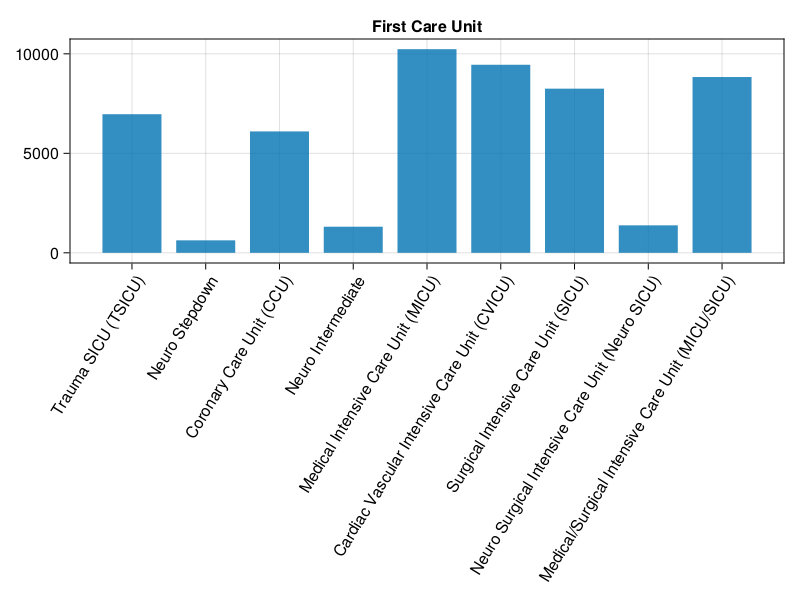

In [16]:
@pipe mimic_icu_cohort |> 
    groupby(_, :first_careunit) |> 
    combine(_, nrow) |>
    barplot(
        _.first_careunit.refs, 
        _.nrow,
        axis = (xticks = (1:size(_, 1), _.first_careunit), title = "First Care Unit", xticklabelrotation = 45.0)
)

### Bivariate summaries

Tally of `thirty_day_mort` vs `first_careunit`.

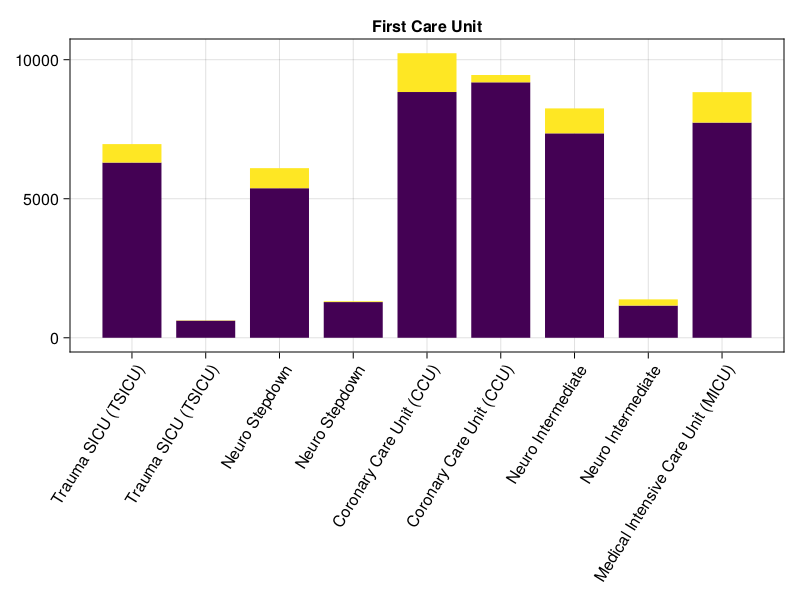

In [17]:
@pipe mimic_icu_cohort |> 
    groupby(_, [:first_careunit, :thirty_day_mort]) |> 
    combine(_, nrow) |>
    disallowmissing(_, :thirty_day_mort) |>
    barplot(
        _.first_careunit.refs, 
        _.nrow, 
        stack = _.thirty_day_mort,
        color = _.thirty_day_mort,
        axis = (xticks = (1:size(_, 1), _.first_careunit), title = "First Care Unit", xticklabelrotation = 45.0)
    )